# Fiber Section Mesh

## Plain Section

First, we need to create a geometric patch, which will be used to generate the section geometry. The patch can take various shapes, such as polygons or circles. For a polygon patch, we need to provide the vertices. For example, a quadrilateral requires four vertices:

In [1]:
import opstool as opst
import matplotlib.pyplot as plt

outlines = [[0, 0], [2, 0], [2, 4], [0, 4]]  # Vertex coordinates
patch = opst.pre.section.create_polygon_patch(outlines)

In [2]:
SEC_MESH = opst.pre.section.FiberSecMesh(sec_name="plain section")
SEC_MESH.add_patch_group({"patch1": patch})
SEC_MESH.set_mesh_size({"patch1": 0.2})
SEC_MESH.mesh()  #  mesh the section
SEC_MESH.centring()

OPSTOOL :: The section plain section has been successfully meshed!

Retrieve the properties of a section:

In [3]:
sec_props = SEC_MESH.get_frame_props(display_results=True)

                           Frame Section Properties                            
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Symbol    ┃ Value                  ┃ Definition                             ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ A         │ 8.000E+00              │ Cross-sectional area                   │
│ centroid  │ (0.000E+00, 0.000E+00) │ Elastic centroid                       │
│ Iy        │ 1.067E+01              │ Moment of inertia y-axis               │
│ Iz        │ 2.667E+00              │ Moment of inertia z-axis               │
│ Iyz       │ 0.000E+00              │ Product of inertia                     │
│ Wyt       │ 5.333E+00              │ Section moduli of top fibres y-axis    │
│ Wyb       │ 5.333E+00              │ Section moduli of bottom fibres y-axis │
│ Wzt       │ 2.667E+00              │ Section moduli of top fibres z-axis    │
│ Wzb       │ 2.667E+00              │ Section moduli of bottom fibres z-axis │
│ J         │ 7.318E+00              │ Torsion constant                       │
│ phi       │ 0.000E+00              │ Principal axis angle                   │
│ rho_rebar │ 0.000E+00              │ Ratio of reinforcement                 │
└───────────┴────────────────────────┴────────────────────────────────────────┘

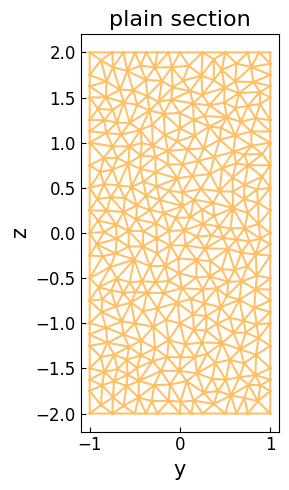

In [4]:
fig, ax = plt.subplots(figsize=(5, 5))
SEC_MESH.view(fill=False, show_legend=False, ax=ax)
ax.set_aspect("equal", "box")
plt.show()

OPSTOOL :: The section plain section has been successfully remeshed!

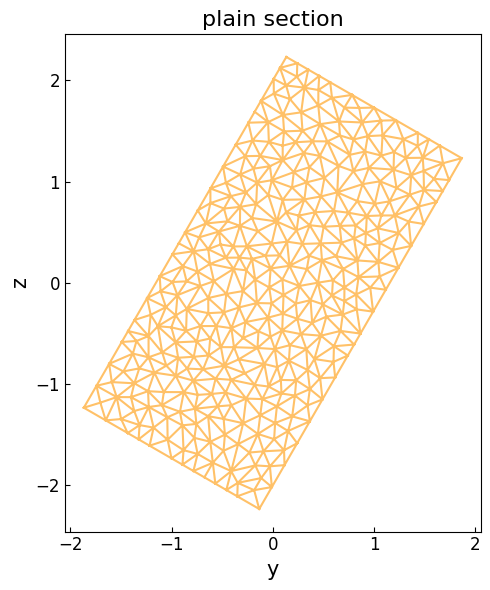

In [5]:
SEC_MESH.rotate(30, remesh=True)
SEC_MESH.view(fill=False, show_legend=False, aspect_ratio="equal")

In [6]:
sec_props30 = SEC_MESH.get_sec_props(display_results=True)

                              Section Properties                               
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Symbol    ┃ Value                  ┃ Definition                             ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ A         │ 8.000E+00              │ Cross-sectional area                   │
│ Asy       │ 6.667E+00              │ Shear area y-axis                      │
│ Asz       │ 6.667E+00              │ Shear area z-axis                      │
│ centroid  │ (0.000E+00, 0.000E+00) │ Elastic centroid                       │
│ Iy        │ 8.667E+00              │ Moment of inertia y-axis               │
│ Iz        │ 4.667E+00              │ Moment of inertia z-axis               │
│ Iyz       │ 3.464E+00              │ Product of inertia                     │
│ Wyt       │ 3.883E+00              │ Section moduli of top fibres y-axis    │
│ Wyb       │ 3.883E+00              │ Section moduli of bottom fibres y-axis │
│ Wzt       │ 2.501E+00              │ Section moduli of top fibres z-axis    │
│ Wzb       │ 2.501E+00              │ Section moduli of bottom fibres z-axis │
│ J         │ 7.318E+00              │ Torsion constant                       │
│ phi       │ -3.000E+01             │ Principal axis angle                   │
│ mass      │ 8.000E+00              │ Section mass                           │
│ rho_rebar │ 0.000E+00              │ Ratio of reinforcement                 │
└───────────┴────────────────────────┴────────────────────────────────────────┘

## Hollow reinforced concrete (RC) section

In [7]:
# Outer contour points
outlines = [[0, 0], [2, 0], [2, 2], [0, 2]]
# After offsetting, we can obtain the inner contour points of the cover layer.
coverlines = opst.pre.section.offset(outlines, d=0.05)
# Create a polygon patch for the outer contour and inner contour of the cover layer
# The cover layer is a polygon with holes
cover_geo = opst.pre.section.create_polygon_patch(outlines, holes=[coverlines])

In [8]:
# Create a polygon patch for the core
holelines = [[0.5, 0.5], [1.5, 0.5], [1.5, 1.5], [0.5, 1.5]]
core_geo = opst.pre.section.create_polygon_patch(coverlines, holes=[holelines])

In [9]:
SEC_MESH = opst.pre.section.FiberSecMesh()
SEC_MESH.add_patch_group({"cover": cover_geo, "core": core_geo})
SEC_MESH.set_mesh_size({"cover": 0.1, "core": 0.15})
SEC_MESH.set_mesh_color({"cover": "#dbb40c", "core": "#88b378"})
SEC_MESH.mesh()

OPSTOOL :: The section My Section has been successfully meshed!

In [10]:
# add rebars to the section
dia = 0.03
rebars_outer = opst.pre.section.offset(coverlines, d=dia / 2)
SEC_MESH.add_rebar_line(points=rebars_outer, dia=dia, n=100, group_name="rebar #30", color="#580f41")

dia = 0.025
rebars_outer = opst.pre.section.offset(holelines, d=-dia / 2 - 0.05)
SEC_MESH.add_rebar_line(points=rebars_outer, dia=dia, gap=0.1, group_name="rebar #25", color="blue")

In [11]:
SEC_MESH.centring()

In [12]:
_ = SEC_MESH.get_frame_props(display_results=True)

                           Frame Section Properties                            
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Symbol    ┃ Value                  ┃ Definition                             ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ A         │ 3.000E+00              │ Cross-sectional area                   │
│ centroid  │ (0.000E+00, 0.000E+00) │ Elastic centroid                       │
│ Iy        │ 1.250E+00              │ Moment of inertia y-axis               │
│ Iz        │ 1.250E+00              │ Moment of inertia z-axis               │
│ Iyz       │ 8.882E-16              │ Product of inertia                     │
│ Wyt       │ 1.250E+00              │ Section moduli of top fibres y-axis    │
│ Wyb       │ 1.250E+00              │ Section moduli of bottom fibres y-axis │
│ Wzt       │ 1.250E+00              │ Section moduli of top fibres z-axis    │
│ Wzb       │ 1.250E+00              │ Section moduli of bottom fibres z-axis │
│ J         │ 2.068E+00              │ Torsion constant                       │
│ phi       │ 0.000E+00              │ Principal axis angle                   │
│ rho_rebar │ 3.116E-02              │ Ratio of reinforcement                 │
└───────────┴────────────────────────┴────────────────────────────────────────┘

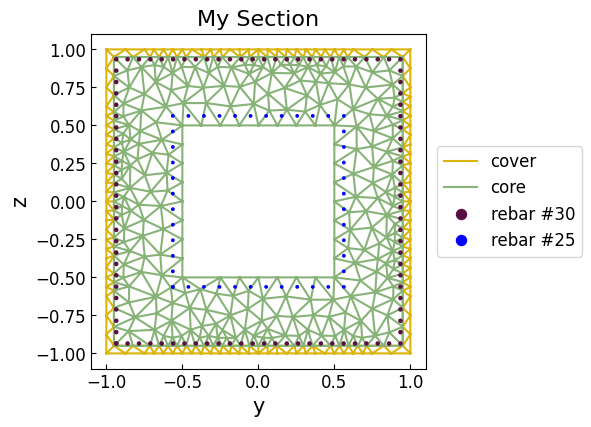

In [13]:
SEC_MESH.view(fill=False, show_legend=True)
plt.show()

OPSTOOL :: The section My Section has been successfully remeshed!

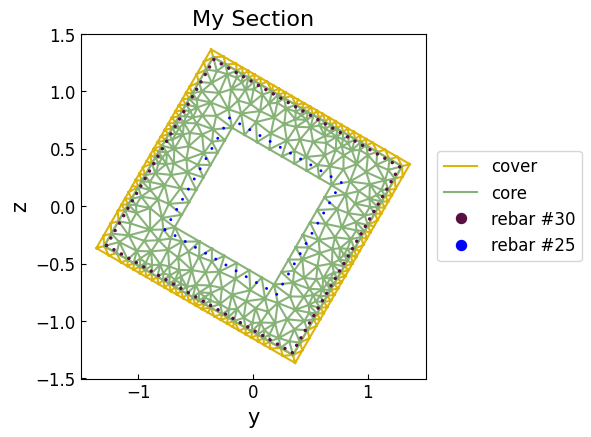

In [14]:
SEC_MESH.rotate(30, remesh=True)
SEC_MESH.view(fill=False, show_legend=True)
plt.show()

## Coupling with OpenSees

Using section mesh in OpenSeesPy is very straightforward.
First, you need to define the materials for each part of the section. 
For example, the following code defines the materials for the cover, core, and reinforcement:

In [15]:
import openseespy.opensees as ops
import opstool as opst

ops.wipe()
ops.model("basic", "-ndm", 3, "-ndf", 6)
coverID, coreID, rebarID = 1, 2, 3
ops.uniaxialMaterial("Concrete01", coverID, -30, -0.002, -15, -0.005)
ops.uniaxialMaterial("Concrete01", coreID, -40, -0.006, -30, -0.015)
ops.uniaxialMaterial("Steel01", rebarID, 200, 2.0e5, 0.02)

As in the example above, define the geometric patch.

In [16]:
# Outer contour points
outlines = [[0, 0], [2, 0], [2, 2], [0, 2]]
# After offsetting, we can obtain the inner contour points of the cover layer.
coverlines = opst.pre.section.offset(outlines, d=0.05)
# Create a polygon patch for the outer contour and inner contour of the cover layer
# The cover layer is a polygon with holes
cover_geo = opst.pre.section.create_polygon_patch(outlines, holes=[coverlines])

# Create a polygon patch for the core
holelines = [[0.5, 0.5], [1.5, 0.5], [1.5, 1.5], [0.5, 1.5]]
core_geo = opst.pre.section.create_polygon_patch(coverlines, holes=[holelines])

In [17]:
SEC_MESH = opst.pre.section.FiberSecMesh()
SEC_MESH.add_patch_group({"cover": cover_geo, "core": core_geo})
SEC_MESH.set_mesh_size({"cover": 0.1, "core": 0.15})
SEC_MESH.set_mesh_color({"cover": "#dbb40c", "core": "#88b378"})
SEC_MESH.set_ops_mat_tag({"cover": coverID, "core": coreID})  # add opensees mat tag !!!
SEC_MESH.mesh()  # mesh the section

# add rebars to the section
dia = 0.03
rebars_outer = opst.pre.section.offset(coverlines, d=dia / 2)
SEC_MESH.add_rebar_line(
    points=rebars_outer,
    dia=dia,
    n=100,
    ops_mat_tag=rebarID,  # add opensees mat tag
    group_name="rebar #30",
    color="#580f41",
)

dia = 0.025
rebars_outer = opst.pre.section.offset(holelines, d=-dia / 2 - 0.05)
SEC_MESH.add_rebar_line(
    points=rebars_outer,
    dia=dia,
    gap=0.1,
    ops_mat_tag=rebarID,  # add opensees mat tag !!!
    group_name="rebar #25",
    color="blue",
)

OPSTOOL :: The section My Section has been successfully meshed!

To retrieve the torsional stiffness:

In [18]:
G = 10000  # shear modulus of the concrete
J = SEC_MESH.get_j()  # get the torsional constant
GJ = G * J
GJ

20682.549805756353

We can directly create OpenSees fiber sections at runtime, where fibers are essentially defined one by one using the 
[fiber](https://opensees.berkeley.edu/wiki/index.php?title=Fiber_Command "fiber") command (with coordinates and areas obtained from triangular meshes):

In [19]:
SEC_MESH.centring()

sec_tag = 1
SEC_MESH.to_opspy_cmds(secTag=sec_tag, GJ=GJ)  # to the opensees commands

The section is now ready to be used elsewhere. For example, we can create the following zero-length element:

In [20]:
ops.node(1, 0, 0, 0)
ops.node(2, 0, 0, 0)

sec_tag = 1
ops.element("zeroLengthSection", sec_tag, 1, 2, sec_tag)

We can visualize the fiber section in the **OpenSeesPy domain** to inspect it. Here's an example of how to do it:

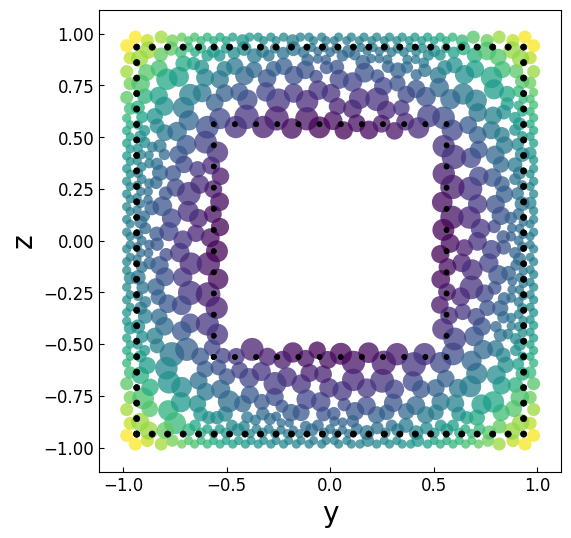

In [21]:
opst.pre.section.vis_fiber_sec_real(ele_tag=sec_tag, highlight_matTag=rebarID, highlight_color="k")
plt.show()

If you want to save it to a file you can do this:

In [ ]:
SEC_MESH.to_file("my_section.py", secTag=1, GJ=GJ, fmt=":.6E")

# SEC_MESH.to_file("my_section.tcl", secTag=1, GJ=GJ, fmt=":.6E")